In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex
import datetime
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

# Show 2 decimals
pd.set_option('display.float_format', lambda x: '%.0f' % x)
#pd.options.display.float_format = '{:,.2f}'.format

#Butun kolon ve satirlari gormek icin
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set plot background
sns.set_theme(style="whitegrid")

# Euro sign €
#print ("%s"%(u"\N{euro sign}"))

In [2]:
auto = pd.read_csv("/Users/macbook/Desktop/csv_dosyalari/autoscout_data_2000.csv")
df = auto.copy()
df.head(2)

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,emissions_sticker,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,"LOON OP ZAND, NL",https://www.autoscout24.com/offers/audi-a3-2-0...,"\n,Audi ,\n","\n,A3,\n",2.0 FSI Ambition Pro Line,"[['\n', '€ 4,450.-', '\n']]","['', ['191,066 km']]","\n,Automatic,\n",08/2003,"\n,Gasoline,\n","110 kW (150 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n3,"Country version,None",\nSJ-112-R,"\n,6 months,\n","[['\n'], ['']]",08/2003,None,05/2022,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,110 kW (150 hp),\n","\n,Automatic,\n","\n,1,984 cc,\n","\n,None,\n","\n,4,\n","\n,1,280 kg,\n","\n,Super 95,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 4,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"
1,"HEERLEN, NL",https://www.autoscout24.com/offers/audi-a3-spo...,"\n,Audi ,\n","\n,A3,\n",Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,"[['\n', '€ 12,950.-', '\n']]","['', ['94,758 km']]","\n,Automatic,\n",10/2013,"\n,Gasoline,\n","92 kW (125 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n5,"Country version,None",\n809725,"\n,None,\n","[['\n'], ['']]",10/2013,None,None,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n","\n,Automatic,\n","\n,1,395 cc,\n","\n,None,\n","\n,4,\n","\n,1,200 kg,\n","\n,Gasoline,\n","['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]","\n4, White",None,None,"\nupholstery, Black","\n8, Cloth"


# Cleansing 

In [3]:
# Drop Duplicated Columns and Url column
df.drop(['url', 'Mileage', 'Power', 'gearbox'], axis=1, inplace= True)

df.columns

Index(['location', 'make', 'model', 'short_description', 'price', 'mileage',
       'registration', 'fuel_type', 'power', 'seller', 'body_type', 'type',
       'drivetrain', 'seats', 'doors', 'country_version', 'offer_number',
       'warranty', 'first_registration', 'production_date',
       'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'previous_owner', 'last_timing_belt_change',
       'Gearbox', 'engine_size', 'gears', 'cylinders', 'empty_weight',
       'Fuel_type', 'fuel_consumption', 'co2_emissions', 'emission_class',
       'emissions_sticker', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nSafety & Security\n', 'extras',
       '\ncolour', '\nmanufacturer_color', '\npaint', ' upholstery_colour ',
       ' upholstery '],
      dtype='object')

In [4]:
# 1 - Rename and Reassign Columns (move unwanted characters from column names)
df.columns = ['location', 'make', 'model', 'short_description', 'price','mileage_km', 'registration', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version','offer_number', 'warranty_months',  'first_registration',
       'production_date', 'general_inspection', 'last_service','full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Gearbox', 'engine_size_cc', 'gears','cylinders', 'empty_weight_kg', 'Fuel_type', 'fuel_consumption',
       'co2_emissions_g_km_comb', 'emission_class', 'emissions_sticker','Comfort & Convenience', 'Entertainment & Media',
       'Safety & Security', 'extras', 'colour', 'manufacturer_color','paint', 'upholstery_colour', 'upholstery']

In [5]:
# 2 - Removing unwanted Chracters from data
# Except these colums ====> location, short_description, registration, first_registration, general_inspection, Comfort & Convenience, Entertainment & Media, Safety & Security, extras
clmns = ['make', 'model', 'price','mileage_km', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version','offer_number', 'warranty_months',
       'production_date', 'last_service','full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Gearbox', 'engine_size_cc', 'gears','cylinders', 'empty_weight_kg', 'Fuel_type', 'fuel_consumption',
       'co2_emissions_g_km_comb', 'emission_class', 'emissions_sticker',
       'colour', 'manufacturer_color','paint', 'upholstery_colour', 'upholstery']

for column in clmns:
    df[column] = df[column].str.replace(r'\W', '')
    
df.head(2)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery
0,"LOON OP ZAND, NL",Audi,A3,2.0 FSI Ambition Pro Line,n4450n,191066km,08/2003,Gasoline,110kW150hp,nDealern,Compact,Used,Front,5,3,CountryversionNone,SJ112R,6months,08/2003,None,05/2022,None,Yes,None,nNone,nNone,Automatic,1984cc,None,4,1280kg,Super95,None,nn,Euro4,None,"[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],4Grey,None,paintMetallic,upholsteryBlack,8Cloth
1,"HEERLEN, NL",Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,n12950n,94758km,10/2013,Gasoline,92kW125hp,nDealern,Compact,Used,Front,5,5,CountryversionNone,809725,None,10/2013,None,None,None,Yes,None,nNone,nNone,Automatic,1395cc,None,4,1200kg,Gasoline,n49l100kmcombn,None,None,None,"[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]",4White,None,None,upholsteryBlack,8Cloth


In [6]:
# 3 - Delete NL from Location
df.location = df['location'].str.replace(', NL', '').str.upper()
df.location = df['location'].str.replace('.', '').str.replace('5', '').str.replace('6', '').str.replace(r'\+318429897', '')
df.location = df.location.replace('', np.NaN)

# Delete n from columns
L01 = ['seller', 'price', 'previous_owner', 'last_timing_belt_change', 'fuel_consumption', 'co2_emissions_g_km_comb']
for i in L01:
    df[i] = df[i].str.replace('n', '')

# Model nNonen to np.NaN
df.model = df.model.str.replace('nNonen', '').replace('', np.NaN)

# Delete [ ] from L02    
L02 = ['Comfort & Convenience', 'Entertainment & Media', 'Safety & Security', 'extras']
for i in L02:
    df[i] = df[i].str.replace('[', '')
    df[i] = df[i].str.replace(']', '')
    
# delete 4 from colour
df['colour'] = df['colour'].str.replace('4', '')

# Delete paint from paint column
df['paint'] = df['paint'].str.replace('paint', '')

# Delete upholstery from upholstery_colour
df['upholstery_colour'] = df['upholstery_colour'].str.replace('upholstery', '')

# Delete 8 from upholstery
df['upholstery'] = df['upholstery'].str.replace('8', '')

df.head(2)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery
0,LOON OP ZAND,Audi,A3,2.0 FSI Ambition Pro Line,4450,191066km,08/2003,Gasoline,110kW150hp,Dealer,Compact,Used,Front,5,3,CountryversionNone,SJ112R,6months,08/2003,None,05/2022,None,Yes,None,Noe,Noe,Automatic,1984cc,None,4,1280kg,Super95,Noe,,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth
1,HEERLEN,Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758km,10/2013,Gasoline,92kW125hp,Dealer,Compact,Used,Front,5,5,CountryversionNone,809725,None,10/2013,None,None,None,Yes,None,Noe,Noe,Automatic,1395cc,None,4,1200kg,Gasoline,49l100kmcomb,Noe,None,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth


In [7]:
df['mileage_km'] = df['mileage_km'].str.replace('km', '')
df['warranty_months'] = df['warranty_months'].str.replace('months', '')
df['engine_size_cc'] = df['engine_size_cc'].str.replace('cc', '')
df['empty_weight_kg'] = df['empty_weight_kg'].str.replace('kg', '')
df['country_version'] = df['country_version'].str.replace('Countryversion', '')
df['co2_emissions_g_km_comb'] = df['co2_emissions_g_km_comb'].str.replace('gkmcomb', '')
df.head(1)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery
0,LOON OP ZAND,Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,08/2003,Gasoline,110kW150hp,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,08/2003,None,05/2022,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth


In [8]:
df1 = df.copy()

L03 = ['price', 'mileage_km','engine_size_cc', 'empty_weight_kg', 'seats', 'doors', 'warranty_months', 'cylinders', 'co2_emissions_g_km_comb']
for i in L03:
    df[i] = df[i].replace(['None', 'Noe', 'Yes', 'Automatic', 'Manual', 'Semiautomatic'], np.NaN)
    df[i] = df[i].replace('', np.NaN)
    df[i] = df[i].astype(float)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,69534,24369,468620,1,8945,17450,28935,123456789
mileage_km,70951,107148,88475,1,30194,95615,163794,2215714
seats,65562,5,1,1,5,5,5,14
doors,69790,5,1,1,4,5,5,6
warranty_months,24004,8,9,1,6,6,6,84
engine_size_cc,65265,1771,702,0,1390,1598,1995,65535
cylinders,64809,4,1,1,4,4,4,12
empty_weight_kg,69500,1433,321,1,1234,1382,1591,4200
co2_emissions_g_km_comb,52190,129,68,0,105,133,164,5900


In [9]:
L04 = ['power_kw', 'power_hp']
df[L04] = df.power.str.split('kW', expand= True)   
df['power_hp'] = df['power_hp'].str.replace('hp', '').replace('None', np.NaN) 
df['power_kw'] = df['power_kw'].str.replace('kg', '').replace('None', np.NaN)     
df[L04] = df[L04].astype(float)
df = df.drop(['power'], axis=1)
df.head(1)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
0,LOON OP ZAND,Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,08/2003,Gasoline,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,08/2003,None,05/2022,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth,110,150


# Duplicated

In [10]:
df.shape

(71104, 46)

In [11]:
df.duplicated().sum()

2012

In [12]:
df.loc[df.duplicated(), :].head(2)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
638,WOMMELS,Audi,A3,1.6 FSI Ambiente,2750,289500,11/2006,Gasoline,Privateseller,Compact,Used,None,5,4,None,None,NaN,11/2006,None,06/2022,None,Yes,None,Noe,Noe,Manual,1598,6,4,1240,Gasoline,67l100kmcomb89l100kmcity54l100kmcoutry,161,Euro4,None,"'Air conditioning', 'Automatic climate control...","'Hands-free equipment', 'On-board computer', '...","'Central door lock', 'Central door lock with r...","'Alloy wheels (16"")', 'Automatically dimming i...",Blue,None,None,None,None,85,116
1199,NAARDEN,Audi,TTS,Roadster 2.0 TFSI quattro Hoofdruimteverwarmin...,49900,5076,10/2017,Gasoline,Dealer,Convertible,Used,4WD,2,2,None,PV399Z,6,10/2017,None,New,None,Yes,None,Noe,Noe,Automatic,1984,6,4,1445,Super95,69l100kmcomb84l100kmcity6l100kmcoutry,159,Euro6,None,"'Air conditioning', 'Cruise control', 'Electri...","'Digital cockpit', 'Hands-free equipment', 'Ra...","'ABS', 'Alarm system', 'Bi-Xenon headlights', ...","'Alloy wheels (18"")', 'Automatically dimming i...",Black,None,Metallic,Black,Fullleather,228,310


In [13]:
print(df.shape)
df.drop_duplicates(inplace= True)

(71104, 46)


In [14]:
df.shape

(69092, 46)

In [15]:
df.duplicated().sum()

0

### Price Null DataFrame

In [16]:
# Find the rows which have no price

price_null_tf = (df['price'].isnull())
price_null = (df[price_null_tf])
price_null.shape

(1523, 46)

### Drop Empty Price, Make , Year Columns

In [17]:
df.shape

(69092, 46)

In [18]:
#df[['price', 'make', 

In [19]:
df.dropna(subset=['price'], inplace= True)
df.shape

(67569, 46)

## DF_Dates 

In [20]:
L05 = ['registration', 'first_registration', 'general_inspection']
for i in L05:
    df[i] = pd.to_datetime(df[i], format= '%m/%Y', errors= 'coerce')

df['production_date'] = pd.to_datetime(df['production_date'], format= '%Y', errors= 'coerce')

# Creating new Features df_dates
df_dates = pd.DataFrame({'registration':  df.registration,
                         'first_registration' : df.first_registration,
                         'production_date' : df.production_date,
                         'general_inspection' : df.general_inspection,
                        'last_timing_belt_change' : df.last_timing_belt_change})

L05 = ['registration', 'first_registration', 'general_inspection']
for i in L05:
    df_dates[i] = pd.to_datetime(df_dates[i], format= '%m/%Y', errors= 'coerce')

df_dates['production_date'] = pd.to_datetime(df_dates['production_date'], format= '%Y', errors= 'coerce')
df_dates['last_timing_belt_change'] = pd.to_datetime(df_dates['last_timing_belt_change'], format= '%m%Y', errors= 'coerce')
df_dates.head()

,registration,first_registration,production_date,general_inspection,last_timing_belt_change
0,2003-08-01,2003-08-01,NaT,2022-05-01,NaT
1,2013-10-01,2013-10-01,NaT,NaT,NaT
2,2013-05-01,2013-05-01,NaT,2022-03-01,NaT
3,2015-06-01,2015-06-01,2015-01-01,NaT,NaT
4,2015-10-01,2015-10-01,NaT,NaT,NaT


In [21]:
df2 = df.copy()

In [22]:
# Add year Column !!!!!!
pd.options.display.float_format = '{:.0f}'.format 
df.insert(4, 'year', df.registration.dt.year, True )
#Add make-model
df.insert(3, 'make_model', (df['make'].astype(str) +"-"+ df["model"].astype(str)), True)
df.head(2)

,location,make,model,make_model,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
0,LOON OP ZAND,Audi,A3,Audi-A3,2.0 FSI Ambition Pro Line,2003,4450,191066,2003-08-01,Gasoline,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,2003-08-01,NaT,2022-05-01,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth,110,150
1,HEERLEN,Audi,A3,Audi-A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,2013,12950,94758,2013-10-01,Gasoline,Dealer,Compact,Used,Front,5,5,None,809725,NaN,2013-10-01,NaT,NaT,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1200,Gasoline,49l100kmcomb,NaN,None,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth,92,125


### Combine Make Column to Make_Counrty Column

In [23]:
german = ['Audi', 'MercedesBenz', 'BMW', 'Volkswagen', 'Opel', 'Skoda']
japan = ['Toyota', 'Honda', 'Mazda']
sweden = ['Volvo']
france = ['Renault', 'Peugeot', 'Citroen']
america = ['Ford', 'Chevrolet', 'Tesla']
south_korea = ['Kia', 'Hyundai']
italy = ['Fiat']
romanian = ['Dacia']

conditions = [ 
    (df.make.isin(german)),
    (df.make.isin(japan)),
    (df.make.isin(sweden)),
    (df.make.isin(france)),
    (df.make.isin(america)),
    (df.make.isin(south_korea)),
    (df.make.isin(italy)),
    (df.make.isin(romanian)),
]

values = ['German', 'Japan', 'Sweden', 'France', 'America', 'South_Korea', 'Italy', 'Romanian']

df['make_country'] = np.select(conditions, values)
df.tail(1)

,location,make,model,make_model,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
71103,SOESTERBERG,Volvo,S60,Volvo-S60,"2.4 Airco, Cruise Control, Stuurbekrachtiging",2001,944,404758,2001-09-01,LPG,Dealer,Sedan,Used,Front,5,4,None,26HNLS,NaN,2001-09-01,NaT,NaT,None,None,None,Noe,Noe,Manual,2435,5,5,1488,LiquidpetroleumgasLPG,84l100kmcomb116l100kmcity65l100kmcoutry,207,Euro3,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,None,Partleather,104,141,Sweden


In [24]:
df.price.isnull().sum()

0

# Wrong Values to NaN

In [25]:
# Year 2025 and 2028 to np.nan
df['year'] = df['year'].replace([2025, 2028], np.NaN)
df.insert(4, 'age', (2022 - df.year), True)
df.head(2)

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
0,LOON OP ZAND,Audi,A3,Audi-A3,19,2.0 FSI Ambition Pro Line,2003,4450,191066,2003-08-01,Gasoline,Dealer,Compact,Used,Front,5,3,None,SJ112R,6,2003-08-01,NaT,2022-05-01,None,Yes,None,Noe,Noe,Automatic,1984,None,4,1280,Super95,Noe,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Alloy wheels',Grey,None,Metallic,Black,Cloth,110,150,German
1,HEERLEN,Audi,A3,Audi-A3,9,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,2013,12950,94758,2013-10-01,Gasoline,Dealer,Compact,Used,Front,5,5,None,809725,NaN,2013-10-01,NaT,NaT,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1200,Gasoline,49l100kmcomb,NaN,None,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'Alarm system', 'Central door lock', 'Central ...","'Alloy wheels (16"")'",White,None,None,Black,Cloth,92,125,German


# PRICE (Last One)

In [26]:
# Wrong Price to NaN

# high price to NaN
#index_list = [1406, 22706, 23072, 66537, 71027]
#df.loc[index_list, 'price'] = np.NaN

# low price to NaN


print(df.price.max())
df.price.isnull().sum()

123456789.0


0

In [27]:
list_short = ['make', 'model', 'price', 'year','age','mileage_km']
df.loc[(df.price <=500) & (df.mileage_km <=100000) , list_short]

,make,model,price,year,age,mileage_km
14588,Ford,KaKa,499,2001,21,31949
17729,Ford,Transit,275,2017,5,77521
50269,Kia,Picanto,239,2022,0,10
52116,Kia,eNiro,464,2022,0,10
52122,Kia,eNiro,484,2022,0,10


In [28]:
df.loc[(df.price <=5000) & (df.mileage_km <=10000) , list_short]

,make,model,price,year,age,mileage_km
9896,BMW,116,4500,2006,16,186
23050,MercedesBenz,Vito,4700,2007,15,250
23882,MercedesBenz,300,2700,2000,22,3000
32155,Volkswagen,Golf,4900,2010,12,1
32160,Volkswagen,Polo,4900,2010,12,1
50269,Kia,Picanto,239,2022,0,10
52113,Kia,EV6,579,2021,1,10
52116,Kia,eNiro,464,2022,0,10
52118,Kia,eNiro,539,2022,0,10
52122,Kia,eNiro,484,2022,0,10


# Missing Value Make

### Make, Model, Mileage_Km

In [29]:
df.loc[(df.model.isnull()) & (df.year.isnull()) & (df.mileage_km.isnull())].shape

(0, 50)

In [30]:
df.loc[(df.model.isnull()) & (df.year.isnull())].shape

(8, 50)

In [31]:
df.loc[(df.model.isnull()) & (df.mileage_km.isnull())].shape

(0, 50)

In [32]:
df.loc[(df.year.isnull()) & (df.mileage_km.isnull())].shape

(5, 50)

In [33]:
df[['model', 'year', 'mileage_km']].isnull().sum()

model           8
year           48
mileage_km    150
dtype: int64

In [34]:
print(df.shape)
df.dropna(subset=['model', 'year','mileage_km'], inplace= True)
df.shape  # 193 index Deleted

(67569, 50)


(67376, 50)

# Save

In [35]:
df.to_csv('auto_02.csv')

# DF_Mercedes_Bmw

In [36]:
L01 = ['MercedesBenz', 'BMW']
df_mer_bmw = df.loc[df.make.isin(L01), :]
df_mer_bmw.to_csv('df_mer_bmw.csv')
df_mer_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13956 entries, 6394 to 25486
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 13955 non-null  object        
 1   make                     13956 non-null  object        
 2   model                    13956 non-null  object        
 3   make_model               13956 non-null  object        
 4   age                      13956 non-null  float64       
 5   short_description        13872 non-null  object        
 6   year                     13956 non-null  float64       
 7   price                    13956 non-null  float64       
 8   mileage_km               13956 non-null  float64       
 9   registration             13956 non-null  datetime64[ns]
 10  fuel_type                13956 non-null  object        
 11  seller                   13956 non-null  object        
 12  body_type                1395

In [37]:
df_mer_bmw.make_model.value_counts().sort_values().head()

MercedesBenz-S300     1
MercedesBenz-220      1
MercedesBenz-E420     1
MercedesBenz-S250     1
MercedesBenz-CE220    1
Name: make_model, dtype: int64

# ML (MERCEDES_BMW)

In [38]:
# Drop the Values smaller than 30 

In [39]:
df_mer_bmw = pd.read_csv('df_mer_bmw.csv')
df_mer_bmw.drop('Unnamed: 0', axis=1, inplace=True)

In [40]:
small_30_tf = (df_mer_bmw.make_model.value_counts() < 30)
small_30_tf[small_30_tf][:5]

BMW-645              True
BMW-430              True
BMW-X4               True
MercedesBenz-A220    True
BMW-135              True
Name: make_model, dtype: bool

In [41]:
list(small_30_tf[:5].index)

['BMW-320', 'BMW-X5', 'MercedesBenz-C180', 'BMW-218', 'BMW-330']

In [42]:
index_criteria = small_30_tf[small_30_tf].index[:10]

In [43]:
small_30_tf[small_30_tf].shape

(203,)

In [44]:
filt = df['make_model'].isin(list(small_30_tf[small_30_tf].index))
df.loc[filt].index

Int64Index([ 6399,  6400,  6410,  6516,  6549,  6589,  6595,  6597,  6606,
             6608,
            ...
            25245, 25247, 25299, 25304, 25318, 25327, 25453, 25466, 25476,
            25483],
           dtype='int64', length=1561)

In [45]:
# All steps in one code line
small_30_tf = (df_mer_bmw.make_model.value_counts() < 30)

index_criteria = small_30_tf[small_30_tf].index

list_criteria = list(index_criteria)

criteria = df_mer_bmw['make_model'].map(lambda x :  x in list_criteria) # criteria = df.make_model.isin(list_criteria)

df_mer_bmw[criteria].index

Int64Index([    5,     6,    16,   115,   147,   185,   191,   193,   202,
              204,
            ...
            13718, 13720, 13770, 13775, 13788, 13797, 13923, 13936, 13945,
            13952],
           dtype='int64', length=1561)

In [46]:
df_mer_bmw.shape

(13956, 50)

In [47]:
# Drop less than 30 Values in DF

df_mer_bmw.drop(index= (df_mer_bmw[criteria].index), inplace= True)
df_mer_bmw.shape

(12395, 50)

In [48]:
df = df_mer_bmw.copy()

### Drop The Values Model == Others

In [49]:
df.loc[df.model == 'Others', :].index
df.drop(index= (df.loc[df.model == 'Others', :].index), inplace= True)
df.shape

(12135, 50)

### Make Co2 Column np.NaN while the Fueltype = L01

In [50]:
L01= ['Gasoline', 'Diesel', 'ElectricGasoline', 'ElectricDiesel', 'LPG', 'CNG', 'Others']
index_01 = df.loc[(df.fuel_type.isin(L01)) & (df.co2_emissions_g_km_comb == 0), ['make_model', 'fuel_type', 'co2_emissions_g_km_comb']].index
index_01

Int64Index([   13,    18,   146,   156,   172,   330,   491,   551,   557,
              564,
            ...
            13903, 13904, 13905, 13906, 13907, 13909, 13911, 13915, 13918,
            13922],
           dtype='int64', length=1086)

In [51]:
df.co2_emissions_g_km_comb.loc[index_01] = np.NaN
df.co2_emissions_g_km_comb.loc[index_01][:5]

13    NaN
18    NaN
146   NaN
156   NaN
172   NaN
Name: co2_emissions_g_km_comb, dtype: float64

In [52]:
df.shape

(12135, 50)

### Drop CNG Fuel Type

In [53]:
index_ = df.loc[df.fuel_type == 'CNG'].index

df.drop(index_, axis=0, inplace= True)

df.shape

(12133, 50)

In [54]:
df.fuel_type.value_counts()

Gasoline            6566
Diesel              2856
ElectricGasoline    1813
Electric             774
ElectricDiesel        90
LPG                   33
Others                 1
Name: fuel_type, dtype: int64

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,12133,8,6,0,4,7,12,25
year,12133,2014,6,1997,2010,2015,2018,2022
price,12133,27474,23641,600,11250,20485,34900,179659
mileage_km,12133,120908,90688,1,47009,112005,178242,827190
seats,11403,5,1,2,5,5,5,9
doors,11898,4,1,2,4,5,5,6
warranty_months,3204,9,8,1,6,6,6,24
engine_size_cc,11268,2056,844,0,1595,1995,2143,65535
cylinders,11166,4,1,1,4,4,4,8
empty_weight_kg,11799,1571,307,112,1335,1480,1720,3960


### Engine Size Control
### np.NaN wich engine size > 6000 

In [56]:
df.engine_size_cc.value_counts().sort_index(ascending= False).head()

65535    1
8592     3
5462     1
5461     2
5000     1
Name: engine_size_cc, dtype: int64

In [57]:
L01 = df.loc[df.engine_size_cc > 6000].index
L01

Int64Index([11711, 11893, 12012, 12708], dtype='int64')

In [58]:
df.engine_size_cc.loc[L01] = np.NaN

df.engine_size_cc.loc[L01]

11711   NaN
11893   NaN
12012   NaN
12708   NaN
Name: engine_size_cc, dtype: float64

### Mileage Control

In [59]:
df.loc[(df.mileage_km < 2500) & (df.year < 2020) , ['make_model', 'year', 'mileage_km']]

,make_model,year,mileage_km
792,BMW-640,2011,1
3343,BMW-116,2006,186
3493,BMW-M3,2017,345
4335,BMW-116,2014,1
4732,BMW-X3,2012,1
5086,BMW-525,2005,328
5582,BMW-525,2010,1
5585,BMW-520,2013,1
9517,MercedesBenz-C180,2008,1
11608,MercedesBenz-Vito,2007,250


In [60]:
df.loc[(df.mileage_km < 2500) & (df.year < 2020) , ['make_model', 'year']].values

array([['BMW-640', 2011.0],
       ['BMW-116', 2006.0],
       ['BMW-M3', 2017.0],
       ['BMW-116', 2014.0],
       ['BMW-X3', 2012.0],
       ['BMW-525', 2005.0],
       ['BMW-525', 2010.0],
       ['BMW-520', 2013.0],
       ['MercedesBenz-C180', 2008.0],
       ['MercedesBenz-Vito', 2007.0],
       ['MercedesBenz-E300', 2011.0],
       ['MercedesBenz-E200', 2015.0],
       ['MercedesBenz-E200', 2010.0]], dtype=object)

### Assign df.mliege_km to MEAN  less than 2500 km and year 2020

In [61]:
index_01 = df.loc[(df.mileage_km < 2500) & (df.year < 2020) , ['make_model', 'year']].index
index_01

Int64Index([792, 3343, 3493, 4335, 4732, 5086, 5582, 5585, 9517, 11608, 11706,
            11827, 12094],
           dtype='int64')

In [62]:
for i in index_01:
    mm = df.loc[i][3]
    yy = df.loc[i][6]
    mileage_mean = df.loc[(df.make_model == (df.loc[792][3])) & (df.year == (df.loc[792][6]))].mileage_km.mean()
    df.mileage_km.loc[i] = int(mileage_mean)
    print(mm, int(yy), int(mileage_mean))

BMW-640 2011 132658
BMW-116 2006 144718
BMW-M3 2017 144718
BMW-116 2014 144718
BMW-X3 2012 144718
BMW-525 2005 144718
BMW-525 2010 144718
BMW-520 2013 144718
MercedesBenz-C180 2008 144718
MercedesBenz-Vito 2007 144718
MercedesBenz-E300 2011 144718
MercedesBenz-E200 2015 144718
MercedesBenz-E200 2010 144718


In [63]:
df.loc[index_01, ['mileage_km']][:3]

,mileage_km
792,132658
3343,144718
3493,144718


### Control Doors

In [64]:
df.doors.value_counts()

5    7446
4    2746
2    1498
3     202
6       6
Name: doors, dtype: int64

In [65]:
df.loc[df.doors == 6]

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
6450,AMSTERDAM DUIVENDRECHT,BMW,X3,BMW-X3,1,Xdrive30e,2021,67900,6774,2021-09-01,ElectricGasoline,Dealer,OffRoadPickup,Used,None,NaN,6,None,9H75423,24,2021-09-01,NaN,NaN,None,None,None,Noe,Noe,Automatic,NaN,8,NaN,NaN,Super95,Noe,NaN,None,None,"'Air conditioning', 'Automatic climate control...","'Digital cockpit', 'Digital radio', 'Radio', '...","'Adaptive headlights', 'Alarm system', 'Emerge...","'Automatically dimming interior mirror', 'Emer...",Grey,None,Metallic,Other,Partleather,NaN,NaN,German
10428,SPAUBEEK,MercedesBenz,C300,MercedesBenz-C300,7,C300 4MATIC,2015,29900,55460,2015-07-01,Gasoline,Dealer,Other,Used,4WD,NaN,6,Netherlands,2578099,6,2015-07-01,2015-01-01,2023-09-01,None,None,Yes,Noe,Noe,Automatic,1991,None,NaN,1780,Gasoline,0l100kmcomb0l100kmcity0l100kmcoutry,NaN,None,None,"'Air conditioning', 'Armrest', 'Cruise control...",'CD player',"'ABS', 'Central door lock', 'Central door lock...",'Alloy wheels',Black,None,None,None,Fullleather,180,245,German
12421,GELDROP,MercedesBenz,Vito,MercedesBenz-Vito,2,Tourer 114 CDI Aut-9 Pro Tourer Lang 9-PERSOON...,2020,45900,11515,2020-07-01,Diesel,Dealer,Van,Used,Rear,9,6,None,N605PB,NaN,2020-07-01,NaN,2024-07-01,None,None,None,Noe,Noe,Automatic,1950,9,4,1942,DieselParticlefilter,7l100kmcomb,192,Euro6dTEMP,None,"'Air conditioning', 'Cruise control', 'Electri...","'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Roof rack',Blue,None,None,Black,Cloth,100,136,German
12517,SCHERPENZEEL,MercedesBenz,Vito,MercedesBenz-Vito,6,119 CDI Blue TEC LANG L3 AUT BJ 2016,2016,16650,306232,2016-03-01,Diesel,Dealer,Transporter,Used,None,2,6,None,VT074X,NaN,2016-03-01,NaN,2022-08-01,None,None,None,Noe,Noe,Automatic,2143,None,4,2125,Diesel,Noe,NaN,nn,None,"'Air conditioning', 'Automatic climate control...","'CD player', 'Radio'","'ABS', 'Central door lock', 'Central door lock...","'Alloy wheels', 'Trailer hitch'",Brown,None,Metallic,Black,Cloth,140,190,German
12640,GEMERT,MercedesBenz,Sprinter,MercedesBenz-Sprinter,5,319 3.0 CDI 366 HDDC,2017,27500,216320,2017-04-01,Diesel,Privateseller,Transporter,Used,Rear,3,6,None,None,NaN,2017-04-01,NaN,2022-05-01,None,Yes,Yes,Noe,Noe,Automatic,2987,7,6,2403,Diesel,96l100kmcomb103l100kmcity92l100kmcoutry,251,Euro6,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'Hands-free equipment', 'MP3', 'R...","'ABS', 'Adaptive headlights', 'Bi-Xenon headli...","'Alloy wheels (17"")', 'Ambient lighting', 'Car...",Grey,None,Metallic,Black,Partleather,140,190,German
12674,HOEVEN,MercedesBenz,Citan,MercedesBenz-Citan,7,109 CDI 90pk XL Lengte 2 L+R Schuifdeur,2015,9440,103314,2015-02-01,Diesel,Dealer,Transporter,Used,None,2,6,Netherlands,VL949V,NaN,2015-02-01,2015-01-01,2022-02-01,None,None,None,Noe,Noe,Manual,1461,5,4,1403,Diesel,47l100kmcomb52l100kmcity45l100kmcoutry,123,Euro5,None,"'Air conditioning', 'Armrest', 'Power windows'...","'On-board computer', 'Radio'","'ABS', 'Central door lock', 'Central door lock...",'Trailer hitch',White,None,None,Black,Cloth,66,90,German


In [66]:
df.doors.loc[df.loc[df.doors == 6].index[:2]]

6450    6
10428   6
Name: doors, dtype: float64

In [67]:
# Assign 5 to doors two model of cars X3, C300
df.doors.loc[df.loc[df.doors == 6].index[:2]] = 5
df.loc[[6450, 10428]]

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
6450,AMSTERDAM DUIVENDRECHT,BMW,X3,BMW-X3,1,Xdrive30e,2021,67900,6774,2021-09-01,ElectricGasoline,Dealer,OffRoadPickup,Used,None,NaN,5,None,9H75423,24,2021-09-01,NaN,NaN,None,None,None,Noe,Noe,Automatic,NaN,8,NaN,NaN,Super95,Noe,NaN,None,None,"'Air conditioning', 'Automatic climate control...","'Digital cockpit', 'Digital radio', 'Radio', '...","'Adaptive headlights', 'Alarm system', 'Emerge...","'Automatically dimming interior mirror', 'Emer...",Grey,None,Metallic,Other,Partleather,NaN,NaN,German
10428,SPAUBEEK,MercedesBenz,C300,MercedesBenz-C300,7,C300 4MATIC,2015,29900,55460,2015-07-01,Gasoline,Dealer,Other,Used,4WD,NaN,5,Netherlands,2578099,6,2015-07-01,2015-01-01,2023-09-01,None,None,Yes,Noe,Noe,Automatic,1991,None,NaN,1780,Gasoline,0l100kmcomb0l100kmcity0l100kmcoutry,NaN,None,None,"'Air conditioning', 'Armrest', 'Cruise control...",'CD player',"'ABS', 'Central door lock', 'Central door lock...",'Alloy wheels',Black,None,None,None,Fullleather,180,245,German


### Control Seats

In [68]:
df.seats.value_counts()

5    9099
4    1486
2     498
3     143
7     129
6      22
9      16
8      10
Name: seats, dtype: int64

In [69]:
# Check From internet All is ok
df.loc[(df.seats == 7) & (df.doors < 5), ['make_model', 'year', 'seats', 'doors']]

,make_model,year,seats,doors
3733,BMW-218,2021,7,4
3758,BMW-218,2019,7,4
3859,BMW-220,2016,7,4
9404,MercedesBenz-E350,2011,7,4
9547,MercedesBenz-ML320,2002,7,4
12521,MercedesBenz-Sprinter,2016,7,4
12576,MercedesBenz-Sprinter,2008,7,4
12768,MercedesBenz-Sprinter,2014,7,4
12998,MercedesBenz-Vito,2021,7,4


In [70]:
df.head(2)

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
0,APLHEN AAN DEN RIJN,BMW,316,BMW-316,21,Compact 316ti Executive,2001,1450,231339,2001-09-01,Gasoline,Dealer,Compact,Used,Rear,5,3,None,28HPDP,NaN,2001-09-01,NaN,NaN,None,None,None,Noe,Noe,Automatic,1796,5,4,1295,Gasoline,Noe,NaN,None,None,"'Air conditioning', 'Armrest', 'Cruise control...","'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Central door lock', 'C...",'Sport suspension',Blue,None,Metallic,None,Cloth,85,116,German
1,ZWOLLE,BMW,320,BMW-320,6,"Gran Turismo 320i Centennial Executive, Automaat,",2016,22490,105267,2016-06-01,Gasoline,Dealer,Compact,Used,Rear,5,5,None,JV357R,6,2016-06-01,NaN,NaN,None,None,None,Noe,Noe,Automatic,1997,None,NaN,1535,Gasoline,Noe,NaN,Euro6,None,"'Armrest', 'Cruise control', 'Electric tailgat...","'CD player', 'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Bi-Xenon headlights', ...","'Alloy wheels (17"")'",Black,None,None,Black,Cloth,133,181,German


## Control Fuel Type 

In [71]:
df.loc[df.fuel_type == 'Others']

,location,make,model,make_model,age,short_description,year,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp,make_country
5692,ARNHEM,BMW,520,BMW-520,14,5er Aut.,2008,7000,226600,2008-06-01,Others,Privateseller,Sedan,Used,None,5,4,None,None,NaN,2008-06-01,NaN,2021-12-01,None,Yes,Yes,Noe,122021,Automatic,1995,6,4,1490,Others,69l100kmcomb94l100kmcity54l100kmcoutry,NaN,Euro4,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'Bluetooth', 'CD player', 'MP3', 'On-board com...","'ABS', 'Bi-Xenon headlights', 'Central door lo...","'Alloy wheels', 'Emergency tyre'",Black,None,None,None,None,125,170,German


In [72]:
df.loc[(df.make_model =='BMW-520') & (df.year == 2008) & (df.engine_size_cc == 1995)& (df.mileage_km > 200000)].fuel_type

2467    Gasoline
3428    Gasoline
3586    Gasoline
5074      Diesel
5255      Diesel
5274      Diesel
5598      Diesel
5692      Others
Name: fuel_type, dtype: object

In [73]:
# Assign Diesel to Others
df.fuel_type.loc[5692] = 'Diesel'
df.loc[5692].fuel_type

'Diesel'

In [74]:
df.make_model.value_counts().shape

(89,)

In [75]:
df.fuel_type.value_counts()

Gasoline            6566
Diesel              2857
ElectricGasoline    1813
Electric             774
ElectricDiesel        90
LPG                   33
Name: fuel_type, dtype: int64

# Get Dummies

## Get Dummies fuel Type

In [76]:
pd.get_dummies(df, columns= ['fuel_type'] , prefix = ['fuelType']).describe().T

,count,mean,std,min,25%,50%,75%,max
age,12133,8,6,0,4,7,12,25
year,12133,2014,6,1997,2010,2015,2018,2022
price,12133,27474,23641,600,11250,20485,34900,179659
mileage_km,12133,121062,90604,1,47216,112215,178242,827190
seats,11403,5,1,2,5,5,5,9
doors,11898,4,1,2,4,5,5,6
warranty_months,3204,9,8,1,6,6,6,24
engine_size_cc,11264,2049,585,0,1595,1995,2143,5462
cylinders,11166,4,1,1,4,4,4,8
empty_weight_kg,11799,1571,307,112,1335,1480,1720,3960


In [77]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.get_dummies(df, columns= ['fuel_type'] , prefix = ['fuelType']).corr()

,age,year,price,mileage_km,seats,doors,warranty_months,engine_size_cc,cylinders,empty_weight_kg,co2_emissions_g_km_comb,power_kw,power_hp,fuelType_Diesel,fuelType_Electric,fuelType_ElectricDiesel,fuelType_ElectricGasoline,fuelType_Gasoline,fuelType_LPG
age,1.0000,-1.0000,-0.7258,0.7402,-0.1941,-0.3505,-0.4734,0.3882,0.4393,-0.2776,0.7208,-0.0649,-0.0645,0.0403,-0.3106,-0.0915,-0.3965,0.4084,0.0864
year,-1.0000,1.0000,0.7258,-0.7402,0.1941,0.3505,0.4734,-0.3882,-0.4393,0.2776,-0.7208,0.0649,0.0645,-0.0403,0.3106,0.0915,0.3965,-0.4084,-0.0864
price,-0.7258,0.7258,1.0000,-0.6835,0.0787,0.1849,0.5126,-0.0013,-0.0547,0.6255,-0.4300,0.4999,0.4995,-0.1672,0.4339,0.1585,0.4318,-0.4020,-0.0443
mileage_km,0.7402,-0.7402,-0.6835,1.0000,-0.0396,-0.1523,-0.4738,0.3212,0.3170,-0.1353,0.4581,-0.0752,-0.0748,0.3680,-0.3140,-0.0773,-0.3406,0.0883,0.0897
seats,-0.1941,0.1941,0.0787,-0.0396,1.0000,0.5373,0.1068,-0.1935,-0.2104,0.0643,-0.2590,-0.0706,-0.0708,0.0335,-0.0703,0.0294,0.1347,-0.0986,0.0164
doors,-0.3505,0.3505,0.1849,-0.1523,0.5373,1.0000,0.1102,-0.2415,-0.2361,0.1563,-0.2787,-0.1398,-0.1401,0.1059,0.1586,0.0311,0.1352,-0.2714,0.0071
warranty_months,-0.4734,0.4734,0.5126,-0.4738,0.1068,0.1102,1.0000,-0.1588,-0.0669,0.2376,-0.2364,0.1228,0.1227,-0.1753,0.1886,0.0457,0.2935,-0.2013,-0.0225
engine_size_cc,0.3882,-0.3882,-0.0013,0.3212,-0.1935,-0.2415,-0.1588,1.0000,0.8978,0.4894,0.5804,0.7027,0.7027,0.1840,-0.1021,-0.0060,-0.1111,-0.0781,0.0762
cylinders,0.4393,-0.4393,-0.0547,0.3170,-0.2104,-0.2361,-0.0669,0.8978,1.0000,0.3327,0.6318,0.6348,0.6345,0.1140,-0.1732,-0.0244,-0.1683,0.0427,0.0665
empty_weight_kg,-0.2776,0.2776,0.6255,-0.1353,0.0643,0.1563,0.2376,0.4894,0.3327,1.0000,0.0714,0.6215,0.6216,0.1497,0.2728,0.1466,0.3477,-0.5372,0.0221


# Label Encoder

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
lbe = LabelEncoder()
lbe.fit_transform(df['fuel_type'])

array([4, 4, 4, ..., 5, 5, 5])

In [80]:
df['new_fuelType'] = lbe.fit_transform(df.fuel_type)
for i in df.fuel_type.value_counts().index:
    print(df.loc[df.fuel_type == i, ['fuel_type', 'new_fuelType']].head(1))

  fuel_type  new_fuelType
0  Gasoline             4
    fuel_type  new_fuelType
658    Diesel             0
             fuel_type  new_fuelType
6381  ElectricGasoline             3
     fuel_type  new_fuelType
5768  Electric             1
           fuel_type  new_fuelType
7469  ElectricDiesel             2
     fuel_type  new_fuelType
7486       LPG             5


In [81]:
df.fuel_type.value_counts()

Gasoline            6566
Diesel              2857
ElectricGasoline    1813
Electric             774
ElectricDiesel        90
LPG                   33
Name: fuel_type, dtype: int64

In [82]:
df3 = df.copy()

In [83]:
df.columns

Index(['location', 'make', 'model', 'make_model', 'age', 'short_description',
       'year', 'price', 'mileage_km', 'registration', 'fuel_type', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version',
       'offer_number', 'warranty_months', 'first_registration',
       'production_date', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Gearbox', 'engine_size_cc', 'gears',
       'cylinders', 'empty_weight_kg', 'Fuel_type', 'fuel_consumption',
       'co2_emissions_g_km_comb', 'emission_class', 'emissions_sticker',
       'Comfort & Convenience', 'Entertainment & Media', 'Safety & Security',
       'extras', 'colour', 'manufacturer_color', 'paint', 'upholstery_colour',
       'upholstery', 'power_kw', 'power_hp', 'make_country', 'new_fuelType'],
      dtype='object')

In [84]:
df[:].select_dtypes(include = ['float64', 'int64']).columns

Index(['age', 'year', 'price', 'mileage_km', 'seats', 'doors',
       'warranty_months', 'engine_size_cc', 'cylinders', 'empty_weight_kg',
       'co2_emissions_g_km_comb', 'power_kw', 'power_hp', 'new_fuelType'],
      dtype='object')

In [85]:
df_new = df.loc[:, ['make_model', 'fuel_type', 'Gearbox', 'age', 'year', 'price', 'mileage_km', 'seats', 'doors',
       'warranty_months', 'engine_size_cc', 'cylinders', 'empty_weight_kg',
       'co2_emissions_g_km_comb', 'power_kw', 'power_hp', 'colour', 'make_country']]
df_new.head(2)

,make_model,fuel_type,Gearbox,age,year,price,mileage_km,seats,doors,warranty_months,engine_size_cc,cylinders,empty_weight_kg,co2_emissions_g_km_comb,power_kw,power_hp,colour,make_country
0,BMW-316,Gasoline,Automatic,21.0000,2001.0000,1450.0000,231339.0000,5.0000,3.0000,NaN,1796.0000,4.0000,1295.0000,NaN,85.0000,116.0000,Blue,German
1,BMW-320,Gasoline,Automatic,6.0000,2016.0000,22490.0000,105267.0000,5.0000,5.0000,6.0000,1997.0000,NaN,1535.0000,NaN,133.0000,181.0000,Black,German


In [86]:
df= pd.read_csv('df_full.csv')
df.country_version.value_counts()

None           10863
Netherlands      989
Germany          253
Belgium           13
France             4
Switzerland        2
Poland             2
Italy              2
Sweden             2
Japan              1
Denmark            1
Austria            1
Name: country_version, dtype: int64

# Save Data

In [87]:
df.to_csv('df_full.csv')

In [88]:
df_new.to_csv('df_15column.csv')

In [89]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df = pd.read_csv('df_full.csv', index_col=[0])
df = df[['make_model', 'year', 'mileage_km','price', 'Gearbox', 'fuel_type', 'colour', 'seller']]
df.head(2)

,make_model,year,mileage_km,price,Gearbox,fuel_type,colour,seller
0,BMW-316,2001,231339,1450,Automatic,Gasoline,Blue,Dealer
1,BMW-320,2016,105267,22490,Automatic,Gasoline,Black,Dealer


In [90]:
print(df.shape)
df.isna().sum()

(12133, 8)


make_model    0
year          0
mileage_km    0
price         0
Gearbox       0
fuel_type     0
colour        0
seller        0
dtype: int64

In [91]:
df.colour.value_counts()

Grey      4177
Black     3953
White     1511
Blue      1362
Silver     358
Brown      267
Red        178
None       114
Green       83
Beige       51
Orange      27
Yellow      26
Gold        12
Violet      12
Bronze       2
Name: colour, dtype: int64

In [92]:
df.seller.value_counts()

Dealer           10748
Privateseller     1385
Name: seller, dtype: int64

## Control Gearbox

In [93]:
df.Gearbox.value_counts()

Automatic        8960
Manual           3050
Semiautomatic     108
None               15
Name: Gearbox, dtype: int64

In [94]:
df.Gearbox = df.Gearbox.replace('None', np.NaN)
df.Gearbox.value_counts()

Automatic        8960
Manual           3050
Semiautomatic     108
Name: Gearbox, dtype: int64

In [95]:
df.shape

(12133, 8)

### Drop NONE Gearboxes

In [96]:
df = df.loc[df.Gearbox.notna(), :]
df.shape

(12118, 8)

# Data preparation For ML Models

In [97]:
dms = pd.get_dummies(df[['make_model', 'Gearbox','fuel_type', 'colour','seller']], prefix='model')
dms.head(1)

,model_BMW-116,model_BMW-118,model_BMW-120,model_BMW-216,model_BMW-218,model_BMW-220,model_BMW-225,model_BMW-316,model_BMW-318,model_BMW-320,model_BMW-325,model_BMW-328,model_BMW-330,model_BMW-335,model_BMW-418,model_BMW-420,model_BMW-428,model_BMW-435,model_BMW-520,model_BMW-523,model_BMW-525,model_BMW-530,model_BMW-535,model_BMW-640,model_BMW-650,model_BMW-730,model_BMW-740,model_BMW-M3,model_BMW-M4,model_BMW-X1,model_BMW-X2,model_BMW-X3,model_BMW-X5,model_BMW-X6,model_BMW-Z3,model_BMW-Z4,model_BMW-i3,model_BMW-i4,model_BMW-iX,model_BMW-iX3,model_MercedesBenz-A150,model_MercedesBenz-A160,model_MercedesBenz-A170,model_MercedesBenz-A180,model_MercedesBenz-A200,model_MercedesBenz-A250,model_MercedesBenz-A45AMG,model_MercedesBenz-B160,model_MercedesBenz-B170,model_MercedesBenz-B180,model_MercedesBenz-B200,model_MercedesBenz-B250,model_MercedesBenz-C180,model_MercedesBenz-C200,model_MercedesBenz-C220,model_MercedesBenz-C250,model_MercedesBenz-C300,model_MercedesBenz-C350,model_MercedesBenz-CLA180,model_MercedesBenz-CLA200,model_MercedesBenz-CLA250,model_MercedesBenz-CLK200,model_MercedesBenz-CLS350,model_MercedesBenz-Citan,model_MercedesBenz-E200,model_MercedesBenz-E220,model_MercedesBenz-E240,model_MercedesBenz-E250,model_MercedesBenz-E300,model_MercedesBenz-E320,model_MercedesBenz-E350,model_MercedesBenz-EQC400,model_MercedesBenz-EQS,model_MercedesBenz-GLA180,model_MercedesBenz-GLA200,model_MercedesBenz-GLA250,model_MercedesBenz-GLA45AMG,model_MercedesBenz-GLC220,model_MercedesBenz-GLC250,model_MercedesBenz-GLC300,model_MercedesBenz-GLC350,model_MercedesBenz-GLE350,model_MercedesBenz-ML320,model_MercedesBenz-ML350,model_MercedesBenz-S350,model_MercedesBenz-SL500,model_MercedesBenz-SLK200,model_MercedesBenz-Sprinter,model_MercedesBenz-Vito,model_Automatic,model_Manual,model_Semiautomatic,model_Diesel,model_Electric,model_ElectricDiesel,model_ElectricGasoline,model_Gasoline,model_LPG,model_Beige,model_Black,model_Blue,model_Bronze,model_Brown,model_Gold,model_Green,model_Grey,model_None,model_Orange,model_Red,model_Silver,model_Violet,model_White,model_Yellow,model_Dealer,model_Privateseller
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [98]:
dms.columns[:5]

Index(['model_BMW-116', 'model_BMW-118', 'model_BMW-120', 'model_BMW-216',
       'model_BMW-218'],
      dtype='object')

In [99]:
list(dms.columns)[:5]

['model_BMW-116',
 'model_BMW-118',
 'model_BMW-120',
 'model_BMW-216',
 'model_BMW-218']

In [100]:
dms = pd.get_dummies(df[['make_model', 'Gearbox','fuel_type', 'colour','seller']], prefix='model')

X_ = df.drop(['price','make_model', 'Gearbox','fuel_type', 'colour','seller'], axis='columns').astype('float64')
y = df.price
X = pd.concat([X_, dms[list(dms.columns)]], axis=1)

pd.set_option('display.float_format', lambda x: '%.0f' % x)
X.head(1)

,year,mileage_km,model_BMW-116,model_BMW-118,model_BMW-120,model_BMW-216,model_BMW-218,model_BMW-220,model_BMW-225,model_BMW-316,model_BMW-318,model_BMW-320,model_BMW-325,model_BMW-328,model_BMW-330,model_BMW-335,model_BMW-418,model_BMW-420,model_BMW-428,model_BMW-435,model_BMW-520,model_BMW-523,model_BMW-525,model_BMW-530,model_BMW-535,model_BMW-640,model_BMW-650,model_BMW-730,model_BMW-740,model_BMW-M3,model_BMW-M4,model_BMW-X1,model_BMW-X2,model_BMW-X3,model_BMW-X5,model_BMW-X6,model_BMW-Z3,model_BMW-Z4,model_BMW-i3,model_BMW-i4,model_BMW-iX,model_BMW-iX3,model_MercedesBenz-A150,model_MercedesBenz-A160,model_MercedesBenz-A170,model_MercedesBenz-A180,model_MercedesBenz-A200,model_MercedesBenz-A250,model_MercedesBenz-A45AMG,model_MercedesBenz-B160,model_MercedesBenz-B170,model_MercedesBenz-B180,model_MercedesBenz-B200,model_MercedesBenz-B250,model_MercedesBenz-C180,model_MercedesBenz-C200,model_MercedesBenz-C220,model_MercedesBenz-C250,model_MercedesBenz-C300,model_MercedesBenz-C350,model_MercedesBenz-CLA180,model_MercedesBenz-CLA200,model_MercedesBenz-CLA250,model_MercedesBenz-CLK200,model_MercedesBenz-CLS350,model_MercedesBenz-Citan,model_MercedesBenz-E200,model_MercedesBenz-E220,model_MercedesBenz-E240,model_MercedesBenz-E250,model_MercedesBenz-E300,model_MercedesBenz-E320,model_MercedesBenz-E350,model_MercedesBenz-EQC400,model_MercedesBenz-EQS,model_MercedesBenz-GLA180,model_MercedesBenz-GLA200,model_MercedesBenz-GLA250,model_MercedesBenz-GLA45AMG,model_MercedesBenz-GLC220,model_MercedesBenz-GLC250,model_MercedesBenz-GLC300,model_MercedesBenz-GLC350,model_MercedesBenz-GLE350,model_MercedesBenz-ML320,model_MercedesBenz-ML350,model_MercedesBenz-S350,model_MercedesBenz-SL500,model_MercedesBenz-SLK200,model_MercedesBenz-Sprinter,model_MercedesBenz-Vito,model_Automatic,model_Manual,model_Semiautomatic,model_Diesel,model_Electric,model_ElectricDiesel,model_ElectricGasoline,model_Gasoline,model_LPG,model_Beige,model_Black,model_Blue,model_Bronze,model_Brown,model_Gold,model_Green,model_Grey,model_None,model_Orange,model_Red,model_Silver,model_Violet,model_White,model_Yellow,model_Dealer,model_Privateseller
0,2001,231339,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [101]:
print(X.shape , y.shape)

(12118, 117) (12118,)


#  01.ML - KNN

In [102]:
# KNN

# Machine Learning Dictionary
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

# Train - Test Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
# 1- Model 
# (n_neighbors = 5 default)
knn_model = KNeighborsRegressor().fit(X_train, y_train)
print('1- n_neighbors =', knn_model.n_neighbors)

# 2- Prediction
y_pred = knn_model.predict(X_test)
print('2 -KNN test error = ', np.sqrt(mean_squared_error(y_test, y_pred)))

# 3- Model Tuning
knn_params = {'n_neighbors': np.arange(1,20,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv= 5)
print('3- CV_Model : ', '\n',knn_cv_model.fit(X_train, y_train))
print('3- Optimum n_neighbors parameter = ', knn_cv_model.best_params_['n_neighbors'])

# 4- Final Model (Tuned Model)
knn_tuned = KNeighborsRegressor(n_neighbors= knn_cv_model.best_params_['n_neighbors']).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
print('4- KNN_CV test error = ',np.sqrt(mean_squared_error(y_test, y_pred)))

1- n_neighbors = 5
2 -KNN test error =  14382.32730820881
3- CV_Model :  
 GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})
3- Optimum n_neighbors parameter =  19
4- KNN_CV test error =  13750.07266533963


## KNN Prediction

In [103]:
X_deneme = X.loc[df.price < 10000]
df.loc[X_deneme.index][:10]

,make_model,year,mileage_km,price,Gearbox,fuel_type,colour,seller
0,BMW-316,2001,231339,1450,Automatic,Gasoline,Blue,Dealer
3,BMW-120,2004,342421,2790,Automatic,Gasoline,Blue,Dealer
5,BMW-118,2005,149400,5950,Automatic,Gasoline,Black,Dealer
10,BMW-118,2007,123015,7950,Automatic,Gasoline,Black,Dealer
114,BMW-116,2008,129451,7750,Automatic,Gasoline,Black,Dealer
116,BMW-116,2009,120784,7950,Automatic,Gasoline,Black,Dealer
117,BMW-118,2006,109433,7745,Automatic,Gasoline,Brown,Dealer
118,BMW-118,2007,106882,7750,Automatic,Gasoline,Brown,Dealer
119,BMW-120,2005,141928,7500,Automatic,Gasoline,Grey,Privateseller
120,BMW-120,2008,139100,7650,Automatic,Gasoline,Black,Privateseller


In [104]:
X_deneme = X.loc[df.price < 10000]
df.loc[X_deneme.index]

pred_deneme = knn_tuned.predict(X_deneme)
print(pred_deneme)
true_deneme = df.loc[X_deneme.index].price

print('4- KNN_Tunned MSE test hata = ',np.sqrt(mean_squared_error(true_deneme, pred_deneme)))
print('4- KNN_Tunned R2 test hata = ',r2_score(true_deneme, pred_deneme))

[ 9075.21052632  7033.47368421 15609.42105263 ...  5544.89473684
  5964.52631579  6798.94736842]
4- KNN_Tunned MSE test hata =  7269.518778112661
4- KNN_Tunned R2 test hata =  -8.694943785305282


# 02.ML - Lasso Regression

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [106]:
from sklearn.linear_model import Lasso

# Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
# 1- Model kurma
# (n_neighbors = 5 default)
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
print('1- alpha =', lasso_model.alpha)

# 2- Tahmin
y_pred = lasso_model.predict(X_test)
print('2- Lasso test hata = ', np.sqrt(mean_squared_error(y_test, y_pred)))

# 3- Model Tuning
lasso_params = {'alpha': np.arange(0.1,0.6,0.1)}
lasso = Lasso(normalize= True)
lasso_cv_model = GridSearchCV(lasso, lasso_params, cv= 5)
print('3- CV_Model : ', '\n',lasso_cv_model.fit(X_train, y_train))
print('3- Optimum alpha parametresi = ', lasso_cv_model.best_params_['alpha'])

# 4- Final Model (Tuned Model)
lasso_tuned = Lasso(alpha = lasso_cv_model.best_params_['alpha'], normalize=True).fit(X_train, y_train)
y_pred = lasso_tuned.predict(X_test)
print('4- LASSO_Tunned test hata = ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('4- R-Squared = ', lasso_tuned.score(X_test, y_test))

1- alpha = 0.1
2- Lasso test hata =  8095.3332077638715
3- CV_Model :  
 GridSearchCV(cv=5, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5])})
3- Optimum alpha parametresi =  0.1
4- LASSO_Tunned test hata =  8097.254463300258
4- R-Squared =  0.8865641120612392


## Lasso Prediction

In [107]:
X_deneme = X.loc[df.price < 15000]
df.loc[[18]]

,make_model,year,mileage_km,price,Gearbox,fuel_type,colour,seller
18,BMW-118,2016,121476,17900,Automatic,Gasoline,Grey,Dealer


In [108]:
X_deneme = X.loc[df.price > 150000]

print('Predictions',lasso_tuned.predict(X_deneme))

print('4- LASSO_Tunned test hata = ',np.sqrt(mean_squared_error(df.loc[X_deneme.index].price, lasso_tuned.predict(X_deneme))))

print('R=Squared = ', lasso_tuned.score(X_train, y_train))

Predictions [72641.51068529 65661.17411787 60336.34836561 43996.52606516]
4- LASSO_Tunned test hata =  111183.13404507766
R=Squared =  0.8991346369503775


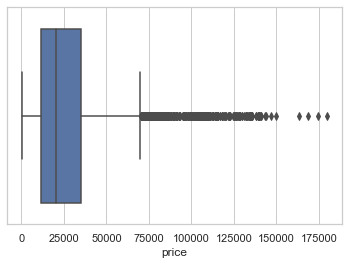

In [109]:
sns.boxplot(x= 'price' ,data=df);

In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12118,2014,6,1997,2010,2015,2018,2022
mileage_km,12118,120949,90581,1,47174,112088,177994,827190
price,12118,27499,23645,600,11406,20499,34900,179659


In [111]:
df.loc[df.year < 2018].describe().T

,count,mean,std,min,25%,50%,75%,max
year,8813,2011,5,1997,2008,2012,2015,2017
mileage_km,8813,156798,78537,4800,98459,144718,201464,827190
price,8813,16955,10472,600,8845,15945,22500,168500


In [112]:
index_ = 1956
X_deneme = X.loc[[index_], : ]

print('Predictions',lasso_tuned.predict(X_deneme))

print('4- LASSO_Tunned test hata = ',np.sqrt(mean_squared_error(df.loc[X_deneme.index].price, lasso_tuned.predict(X_deneme))))

Predictions [21515.59815832]
4- LASSO_Tunned test hata =  1556.598158316221


In [113]:
df.loc[df.make_model == 'BMW-X5'][:5]

,make_model,year,mileage_km,price,Gearbox,fuel_type,colour,seller
1591,BMW-X5,2003,346460,4395,Automatic,Gasoline,Grey,Dealer
1592,BMW-X5,2008,199895,18950,Automatic,Gasoline,Black,Dealer
1601,BMW-X5,2002,189884,10950,Automatic,Gasoline,Grey,Dealer
1602,BMW-X5,2002,214564,10950,Automatic,Gasoline,Grey,Dealer
1616,BMW-X5,2014,298312,23950,Automatic,Gasoline,Black,Dealer


# 03.ML - GBM 

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

gbm_model =  GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)
print('GBM hata : ', np.sqrt(mean_squared_error(y_test, y_pred)))

gbm_params = {
            'learning_rate' :[0.01, 0.1],
            'max_depth': [50,100],
            'n_estimators': [100],
            'subsample': [1, 0.5],}

#gbm = GradientBoostingRegressor()
#gbm_cv_model =  GridSearchCV(gbm, gbm_params, cv=5, n_jobs=-1, verbose=2)
#gbm_cv_model.fit(X_train, y_train)

#gbm_cv_model.best_params_

gbm_tuned = GradientBoostingRegressor()

gbm_tuned = GradientBoostingRegressor ( learning_rate= 0.1,
                                       max_depth= 100,
                                       n_estimators= 100,
                                       subsample= 0.5)

gbm_tuned = gbm_tuned.fit(X_train, y_train)

y_pred =  gbm_tuned.predict(X_test)
print('GBM_Tuned Hata :', np.sqrt(mean_squared_error(y_test, y_pred)))

GBM hata :  6558.2991461710935
GBM_Tuned Hata : 5319.5489030900935


In [116]:
Importance = pd.DataFrame({'Importance': gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Importance of features')

<Figure size 2880x2880 with 0 Axes>

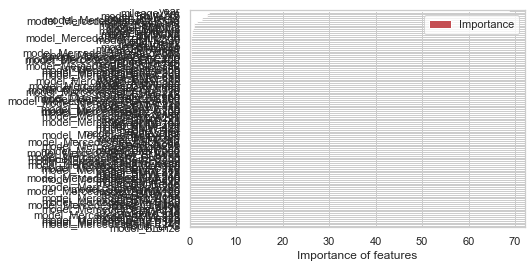

In [117]:
plt.figure(figsize=(40,40))
Importance.sort_values(by = 'Importance',
                      axis=0,
                      ascending= True).plot(kind ='barh', color='r')

plt.xlabel('Importance of features')

In [118]:
Importance.sort_values(by = 'Importance',
                      axis=0,
                      ascending= True).index

Index(['model_Bronze', 'model_LPG', 'model_MercedesBenz-E240',
       'model_MercedesBenz-E320', 'model_MercedesBenz-B170', 'model_BMW-523',
       'model_BMW-328', 'model_MercedesBenz-ML320', 'model_Gold',
       'model_BMW-418',
       ...
       'model_BMW-i3', 'model_Manual', 'model_BMW-M3', 'model_Gasoline',
       'model_MercedesBenz-GLE350', 'model_MercedesBenz-EQS', 'model_BMW-iX',
       'model_BMW-X5', 'mileage_km', 'year'],
      dtype='object', length=117)

# Pipeline gbm_tuned

In [119]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [120]:
df.head(2)

,make_model,year,mileage_km,price,Gearbox,fuel_type,colour,seller
0,BMW-316,2001,231339,1450,Automatic,Gasoline,Blue,Dealer
1,BMW-320,2016,105267,22490,Automatic,Gasoline,Black,Dealer


In [121]:
X = df.drop('price',axis='columns')
y = df.price

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [123]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['make_model', 'Gearbox','fuel_type', 'colour','seller']),
    remainder = 'passthrough')

In [124]:
column_trans.fit_transform(X_train)

<9088x117 sparse matrix of type '<class 'numpy.float64'>'
	with 63616 stored elements in Compressed Sparse Row format>

In [125]:
pipe = make_pipeline(column_trans, gbm_tuned)

In [126]:
cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error' )

array([-20486705.1845511 , -20994563.52975954, -22456878.49970125,
       -18992964.92650267, -21572647.69286399])

In [127]:
X_new = X_test.sample(3, random_state=99)
df.loc[X_new.index, :]

,make_model,year,mileage_km,price,Gearbox,fuel_type,colour,seller
11120,MercedesBenz-EQS,2021,10,135414,Automatic,Electric,Grey,Dealer
10082,MercedesBenz-ML350,2011,128356,22950,Automatic,Diesel,Black,Dealer
5119,BMW-320,2015,45293,21445,Automatic,Diesel,Black,Dealer


In [128]:
pipe.fit(X_train, y_train)
# pipe.predict(X_new) 

np.around(pipe.predict(X_new) , 0)

array([133869.,  26978.,  24030.])

In [129]:
y_pred =  pipe.predict(X_new)
y_test = df.loc[X_new.index, :].price
np.sqrt(mean_squared_error(y_test, y_pred))

2903.8664174894175

# Pipeline XGBoost

In [130]:
#!pip install xgboost
import xgboost as xgb


In [131]:
#DM_train = xgb.DMatrix(data= X_train, label = y_train)
#DM_test = xgb.DMatrix(data= X_test, label = y_test)

from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [132]:
X = df.drop('price',axis='columns')
X[['make_model', 'Gearbox', 'fuel_type']] = X[['make_model', 'Gearbox', 'fuel_type']].astype('category')
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [133]:
#X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12118 entries, 0 to 12132
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   make_model  12118 non-null  category
 1   year        12118 non-null  float64 
 2   mileage_km  12118 non-null  float64 
 3   Gearbox     12118 non-null  category
 4   fuel_type   12118 non-null  category
 5   colour      12118 non-null  object  
 6   seller      12118 non-null  object  
dtypes: category(3), float64(2), object(2)
memory usage: 770.0+ KB


In [134]:
#xgb_model = XGBRegressor()
#xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [139]:
#xgb_model = XGBRegressor(enable_categorical=True)
#xgb_model.fit(X_train, y_train)

# Compare ML Models X_new

In [136]:
X = df.drop('price',axis='columns')
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


list_ml = [knn_tuned, lasso_tuned, gbm_tuned]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['make_model', 'Gearbox','fuel_type', 'colour','seller']),
    remainder = 'passthrough')

#pipe = make_pipeline(column_trans, clf)

for clf in list_ml:
    X_new = X_test.sample(100, random_state=99)
    
    pipe = make_pipeline(column_trans, clf)
    pipe.fit(X_train, y_train)
    
    y_pred =  pipe.predict(X_new)
    y_test = df.loc[X_new.index, :].price

    print(clf, np.around(np.sqrt(mean_squared_error(y_test, y_pred))))

KNeighborsRegressor(n_neighbors=19) 15152.0
Lasso(alpha=0.1, normalize=True) 5513.0
GradientBoostingRegressor(max_depth=100, subsample=0.5) 3354.0


# Compare ML Models  X_test

In [137]:
df.head(1)

,make_model,year,mileage_km,price,Gearbox,fuel_type,colour,seller
0,BMW-316,2001,231339,1450,Automatic,Gasoline,Blue,Dealer


In [138]:
X = df.drop('price',axis='columns')
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

list_ml = [knn_tuned, lasso_tuned, gbm_tuned]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['make_model', 'Gearbox','fuel_type', 'colour','seller']),
    remainder = 'passthrough')

#pipe = make_pipeline(column_trans, clf)

for clf in list_ml:
    
    pipe = make_pipeline(column_trans, clf)
    pipe.fit(X_train, y_train)
    
    y_pred =  pipe.predict(X_test)

    print(clf, np.around(np.sqrt(mean_squared_error(y_test, y_pred))))

KNeighborsRegressor(n_neighbors=19) 13750.0
Lasso(alpha=0.1, normalize=True) 8097.0
GradientBoostingRegressor(max_depth=100, subsample=0.5) 5420.0


# Price Null Prediction

In [140]:
#price_null.drop('year', axis=1, inplace=True)
price_null.head(1)

,location,make,model,short_description,price,mileage_km,registration,fuel_type,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty_months,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Gearbox,engine_size_cc,gears,cylinders,empty_weight_kg,Fuel_type,fuel_consumption,co2_emissions_g_km_comb,emission_class,emissions_sticker,Comfort & Convenience,Entertainment & Media,Safety & Security,extras,colour,manufacturer_color,paint,upholstery_colour,upholstery,power_kw,power_hp
54,OSS,Audi,A1,1.4 TFSI Sport S-Tronic 2x S-LINE NAVI BT XENO...,NaN,99230,09/2016,Gasoline,Dealer,Compact,Used,Front,4,3,None,AVM2979,NaN,09/2016,None,09/2022,None,Yes,None,Noe,Noe,Automatic,1395,None,4,1090,Super95,5l100kmcomb62l100kmcity43l100kmcoutry,113,Euro6,None,"'Air conditioning', 'Armrest', 'Automatic clim...","'CD player', 'MP3', 'On-board computer', 'Radio'","'ABS', 'Alarm system', 'Bi-Xenon headlights', ...","'Alloy wheels (17"")', 'Automatically dimming i...",Black,None,Metallic,Black,Partleather,93,126


In [141]:
price_null.registration = pd.to_datetime(price_null.registration, format= '%m/%Y', errors= 'coerce')
price_null.insert(4, 'year', price_null.registration.dt.year, True )

price_null_deneme = price_null.loc[: , ['make' , 'model', 'year', 'mileage_km','price', 'Gearbox', 'fuel_type', 'colour', 'seller']] 
price_null_deneme.insert(0, 'make_model', (price_null_deneme['make'].astype(str) +"-"+ price_null_deneme["model"].astype(str)), True)
price_null_deneme = price_null_deneme.loc[: , ['make', 'make_model', 'year', 'mileage_km','price', 'Gearbox', 'fuel_type', 'colour', 'seller']]

price_null_deneme = price_null_deneme.loc[(price_null_deneme.make == 'BMW') | (price_null_deneme.make == 'MercedesBenz'), : ]
price_null_deneme.drop('make', axis=1, inplace=True)
price_null_deneme.head()

,make_model,year,mileage_km,price,Gearbox,fuel_type,colour,seller
6418,BMW-118,2017,99889,NaN,Automatic,Gasoline,Grey,Dealer
6436,BMW-535,2010,141288,NaN,Automatic,Gasoline,Grey,Dealer
6442,BMW-320,2013,168723,NaN,Automatic,Gasoline,Brown,Dealer
6445,BMW-118,2016,104264,NaN,Automatic,Gasoline,Orange,Dealer
6458,BMW-335,2013,168661,NaN,Automatic,Gasoline,Blue,Dealer


In [142]:
#price_null_deneme = price_null_deneme[['make_model', 'fuel_type', 'year', 'price', 'mileage_km']]
price_null_deneme.head()

,make_model,year,mileage_km,price,Gearbox,fuel_type,colour,seller
6418,BMW-118,2017,99889,NaN,Automatic,Gasoline,Grey,Dealer
6436,BMW-535,2010,141288,NaN,Automatic,Gasoline,Grey,Dealer
6442,BMW-320,2013,168723,NaN,Automatic,Gasoline,Brown,Dealer
6445,BMW-118,2016,104264,NaN,Automatic,Gasoline,Orange,Dealer
6458,BMW-335,2013,168661,NaN,Automatic,Gasoline,Blue,Dealer


In [143]:
list_unknown_categories = ['MercedesBenz-E500', 'MercedesBenz-ML300', 'MercedesBenz-CL600', 'MercedesBenz-GLE53AMG', 'BMW-X3M', 'MercedesBenz-CLC', 'MercedesBenz-CLS320',
                           'MercedesBenz-GL420', 'BMW-240', 'MercedesBenz-C240', 'BMW-323', 'BMW-528', 'BMW-430', 'MercedesBenz-SL350', 'BMW-Others', 'BMW-518', 
                           'MercedesBenz-CLK320', 'MercedesBenz-C230', 'MercedesBenz-S400', 'BMW-Z4M', 'MercedesBenz-GLK350', 'MercedesBenz-GLE450', 'MercedesBenz-SLK55AMG',
                           'MercedesBenz-E280', 'BMW-750', 'MercedesBenz-CL500', 'BMW-X6M', 'BMW-440', 'MercedesBenz-SLK350', 'MercedesBenz-S500', 'MercedesBenz-CLK',
                           'BMW-340', 'BMW-630', 'BMW-760', 'MercedesBenz-CLS250', 'MercedesBenz-GLK200', 'BMW-M5', 'MercedesBenz-Viano', 'MercedesBenz-E400', 
                           'MercedesBenz-GL320', 'MercedesBenz-A220', 'BMW-214']
pipe.fit(X_train, y_train)
prediction = pipe.predict(price_null_deneme.loc[~price_null_deneme.make_model.isin(list_unknown_categories)])
prediction

array([ 20406.24730578,  19898.16391254,  17278.90058232,  17522.13364709,
        20482.84601617,  22925.96699838,  17130.42801129,   8131.26724427,
        13294.62548145,   9955.30028287,   9838.54705801,   7622.61050866,
         7668.12164058,   7615.85486759,   6273.98325069,   4850.40653431,
         4180.33578717,   5359.48122081,   5104.17810821,  18755.58618236,
         4704.45136877,  21446.36225519,  23382.43634393,  34046.15686742,
        19992.71071367,   6757.28155691,  19259.18211309,  11278.16586944,
        12936.80586634,  17322.47781895,  14594.01816688,   8975.80499906,
        11046.50168096,   5337.95959474,  20107.48050782,  14940.43523803,
        12257.26632104,  12820.95726723,  10913.62596447,   6017.14290021,
         6387.70704002,  26073.2339846 ,  12826.20342709,  10685.15936783,
         8830.08159427,  23943.38422919,  26653.74464872,  14511.16927719,
        15557.38642468,   8467.8437072 ,   8364.02666077,  11850.88767573,
        52799.98876921,  

In [144]:
index01 = price_null_deneme.loc[~price_null_deneme.make_model.isin(list_unknown_categories)].index
index01

Int64Index([ 6418,  6436,  6442,  6445,  6458,  6461,  6473,  6529,  6574,
             6578,
            ...
            24297, 24311, 24517, 24530, 24533, 24685, 24978, 25263, 25289,
            25474],
           dtype='int64', length=290)

In [145]:
i = 6473
model = price_null_deneme.loc[i].make_model
fuel = price_null_deneme.loc[i].fuel_type
year = price_null_deneme.loc[i].year
mileage = price_null_deneme.loc[i].mileage_km
df.loc[(df.make_model == model) &
      (df.fuel_type == fuel) &
      (df.year == year) &
      (df.mileage_km >= (mileage - 10000)) & (df.mileage_km <= mileage + 10000 )]


,make_model,year,mileage_km,price,Gearbox,fuel_type,colour,seller
1312,BMW-320,2013,149523,15995,Automatic,Gasoline,Grey,Privateseller
2094,BMW-320,2013,137431,17945,Automatic,Gasoline,Blue,Dealer
2156,BMW-320,2013,142406,16999,Automatic,Gasoline,Black,Dealer
2279,BMW-320,2013,146074,14950,Manual,Gasoline,Black,Dealer
3032,BMW-320,2013,153271,13500,Manual,Gasoline,Brown,Dealer
3034,BMW-320,2013,146233,14999,Manual,Gasoline,Grey,Dealer
3035,BMW-320,2013,138293,14950,Manual,Gasoline,Black,Dealer
3130,BMW-320,2013,143500,12650,Manual,Gasoline,Brown,Privateseller


### Join DF and Prediction

In [146]:
df_01 = price_null_deneme.loc[index01]
df_pre = pd.DataFrame({'Prediction' : prediction})
df_new = df_01.set_index(df_01.index).join(df_pre.set_index(df_01.index))
df_new.head(10)

,make_model,year,mileage_km,price,Gearbox,fuel_type,colour,seller,Prediction
6418,BMW-118,2017,99889,NaN,Automatic,Gasoline,Grey,Dealer,20406
6436,BMW-535,2010,141288,NaN,Automatic,Gasoline,Grey,Dealer,19898
6442,BMW-320,2013,168723,NaN,Automatic,Gasoline,Brown,Dealer,17279
6445,BMW-118,2016,104264,NaN,Automatic,Gasoline,Orange,Dealer,17522
6458,BMW-335,2013,168661,NaN,Automatic,Gasoline,Blue,Dealer,20483
6461,BMW-420,2014,151941,NaN,Automatic,Gasoline,Grey,Dealer,22926
6473,BMW-320,2013,144193,NaN,Automatic,Gasoline,Grey,Dealer,17130
6529,BMW-118,2006,162355,NaN,Automatic,Gasoline,Black,Dealer,8131
6574,BMW-118,2012,184384,NaN,Automatic,Gasoline,Blue,Dealer,13295
6578,BMW-118,2011,159250,NaN,Automatic,Gasoline,Grey,Dealer,9955
